In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.preprocessing import MinMaxScaler, Normalizer, LabelEncoder, OneHotEncoder
# OneHotEncoder, StandardScaler, MinMaxScaler, Normalizer, RobustScaler, MaxAbsScaler
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [41]:
data = pd.read_csv('ks-projects-201801.csv')

In [42]:
len(data.index)

378661

In [43]:
data.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

In [44]:
data.dtypes

ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

In [45]:
data.backers = data.backers.astype('float64')

In [46]:
data['launched_dt'] = pd.to_datetime(data.launched)
data['launched_dt_month'] = data.launched_dt.dt.month

data['deadline_dt'] = pd.to_datetime(data.deadline)
data['deadline_dt_month'] = data.deadline_dt.dt.month.astype('float64')

data['duration_days'] = (data.deadline_dt - data.launched_dt).dt.days.astype('float64')

In [47]:
data.dropna(inplace=True)
print('isna\n', data.isna().any())
data = data[['ID', 'usd_goal_real', 'backers', 'currency', 'state', 'launched_dt_month', 'deadline_dt_month', 'duration_days']]

isna
 ID                   False
name                 False
category             False
main_category        False
currency             False
deadline             False
goal                 False
launched             False
pledged              False
state                False
backers              False
country              False
usd pledged          False
usd_pledged_real     False
usd_goal_real        False
launched_dt          False
launched_dt_month    False
deadline_dt          False
deadline_dt_month    False
duration_days        False
dtype: bool


In [48]:
data.describe()

,ID,usd_goal_real,backers,launched_dt_month,deadline_dt_month,duration_days
count,3.748600e+05,3.748600e+05,374860.000000,374860.000000,374860.000000,374860.000000
mean,1.074652e+09,4.586303e+04,106.688366,6.464635,6.724473,33.497708
std,6.191368e+08,1.158767e+06,911.710124,3.327861,3.341238,66.232138
min,5.971000e+03,1.000000e-02,0.000000,1.000000,1.000000,0.000000
25%,5.380633e+08,2.000000e+03,2.000000,4.000000,4.000000,29.000000
50%,1.075289e+09,5.500000e+03,12.000000,7.000000,7.000000,29.000000
75%,1.610137e+09,1.600000e+04,57.000000,9.000000,10.000000,36.000000
max,2.147476e+09,1.663614e+08,219382.000000,12.000000,12.000000,16738.000000


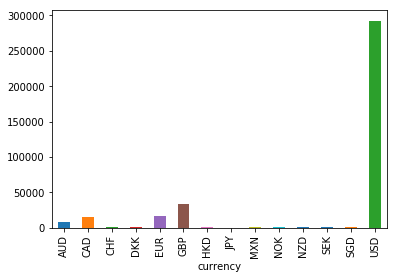

In [49]:
data.groupby('currency').count().ID.plot.bar()

In [50]:
data = data[data.state.isin(['successful', 'failed'])]
data = data[data.currency == 'USD']
data = data[data.duration_days > 0]

In [51]:
label_enc = LabelEncoder()
data['state_enc'] = label_enc.fit_transform(data.state)

In [52]:
gb_deadline_dt_month = data.groupby(['deadline_dt_month', 'state'])
gb_deadline_dt_month = gb_deadline_dt_month.count().ID.unstack()
gb_deadline_dt_month.head()

state,failed,successful
deadline_dt_month,,
1.0,9198,5855
2.0,9936,6885
3.0,12783,9943
4.0,12834,10109
5.0,13555,10319


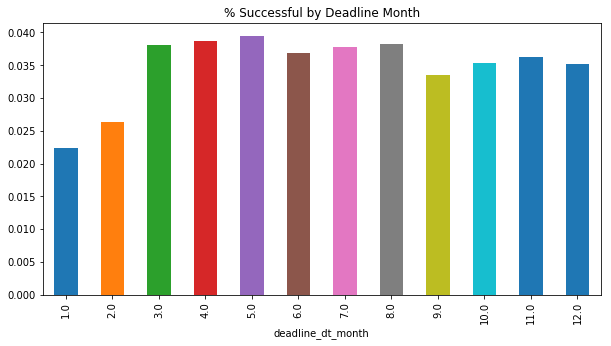

In [53]:
months = np.array(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
deadline_success_ratio = gb_deadline_dt_month.loc[:, 'successful'].div(len(data.index))
deadline_success_ratio.plot.bar(figsize=(10, 5), title='% Successful by Deadline Month')

In [54]:
data.head()

,ID,usd_goal_real,backers,currency,state,launched_dt_month,deadline_dt_month,duration_days,state_enc
1,1000003930,30000.0,15.0,USD,failed,9,11.0,59.0,0
2,1000004038,45000.0,3.0,USD,failed,1,2.0,44.0,0
3,1000007540,5000.0,1.0,USD,failed,3,4.0,29.0,0
5,1000014025,50000.0,224.0,USD,successful,2,4.0,34.0,1
6,1000023410,1000.0,16.0,USD,successful,12,12.0,19.0,1


In [55]:
len(data.index)

261292

In [56]:
data['usd_goal_real_log'] = data.usd_goal_real.apply(np.log)

In [57]:
data = data[data.backers > 0]
data['backers_log'] = data.backers.apply(np.log)

In [58]:
data.describe()

,ID,usd_goal_real,backers,launched_dt_month,deadline_dt_month,duration_days,state_enc,usd_goal_real_log,backers_log
count,2.324380e+05,2.324380e+05,232438.000000,232438.000000,232438.000000,232438.000000,232438.000000,232438.000000,232438.000000
mean,1.074891e+09,3.388511e+04,138.013823,6.362738,6.712414,33.097884,0.470130,8.582673,3.044232
std,6.189952e+08,9.245107e+05,1101.126017,3.300926,3.297571,12.798537,0.499108,1.597663,1.863172
min,5.971000e+03,1.000000e-02,1.000000,1.000000,1.000000,1.000000,0.000000,-4.605170,0.000000
25%,5.380458e+08,2.000000e+03,5.000000,4.000000,4.000000,29.000000,0.000000,7.600902,1.609438
50%,1.076109e+09,5.000000e+03,23.000000,6.000000,7.000000,29.000000,0.000000,8.517193,3.135494
75%,1.610608e+09,1.500000e+04,77.000000,9.000000,10.000000,36.000000,1.000000,9.615805,4.343805
max,2.147476e+09,1.000000e+08,219382.000000,12.000000,12.000000,91.000000,1.000000,18.420681,12.298570


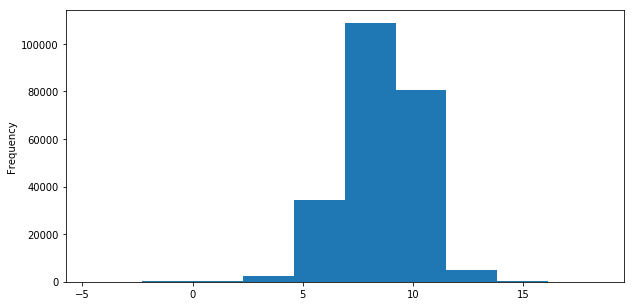

In [59]:
data.usd_goal_real_log.plot.hist(figsize=(10, 5))

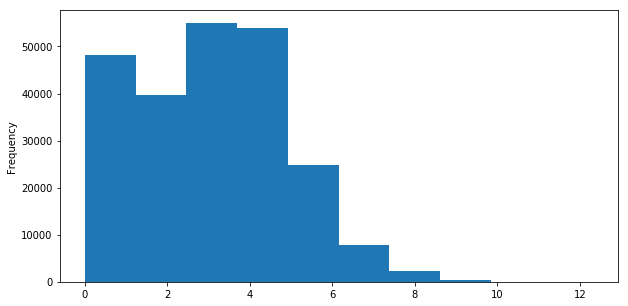

In [60]:
data.backers_log.plot.hist(figsize=(10, 5))

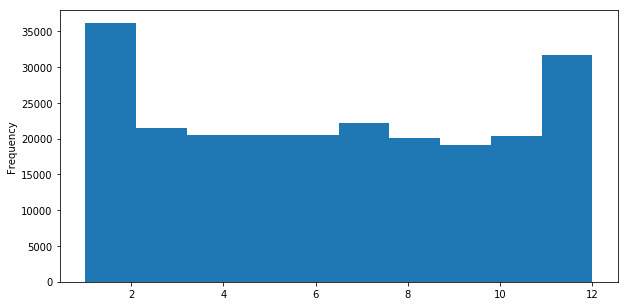

In [61]:
data.launched_dt_month.plot.hist(figsize=(10, 5))

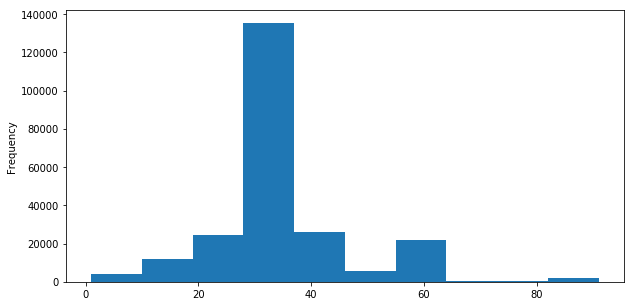

In [62]:
data.duration_days.plot.hist(figsize=(10, 5))

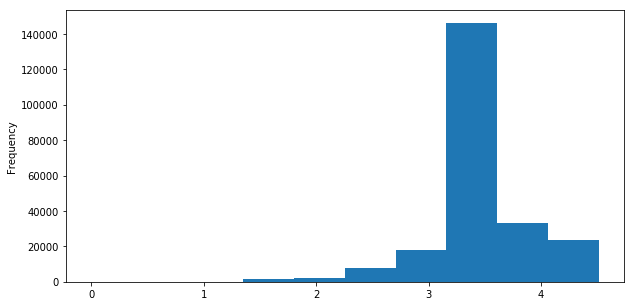

In [63]:
data.duration_days.apply(np.log).plot.hist(figsize=(10, 5))

In [64]:
for f in ['backers_log', 'usd_goal_real_log', 'launched_dt_month', 'deadline_dt_month', 'duration_days']:
    clf = LogisticRegression()
    clf.fit(data[[f]], data.state.values.ravel())
    print(f, clf.score(data[[f]], data.state.values.ravel()))

backers_log 0.8219697295622919
usd_goal_real_log 0.5959610734905653
launched_dt_month 0.5298703310130013
deadline_dt_month 0.5298703310130013
duration_days 0.5674846625766872


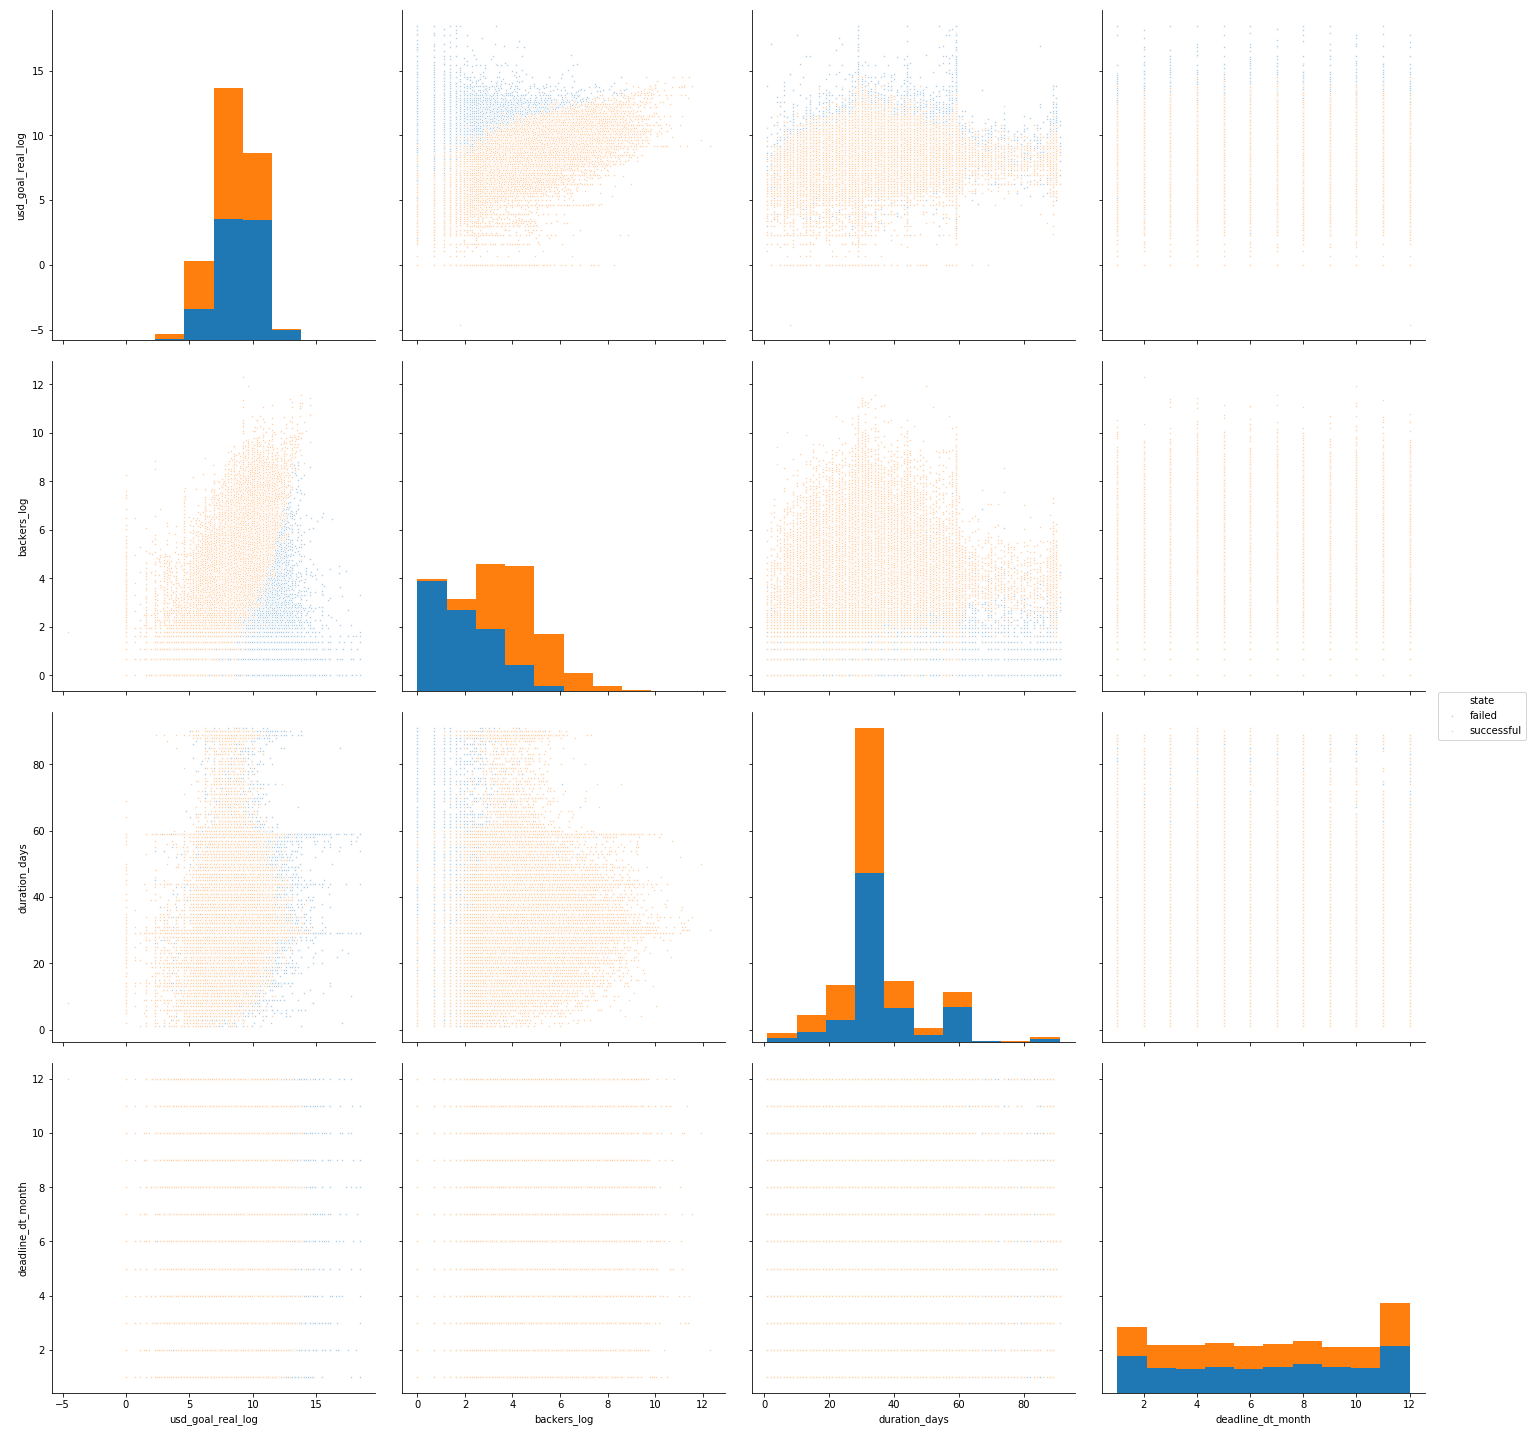

In [65]:
pairs = ['usd_goal_real_log', 'backers_log', 'duration_days', 'deadline_dt_month']
g = sns.pairplot(data, size=5, aspect=1, hue='state', vars=pairs, plot_kws=dict(s=3))

In [66]:
features = ['usd_goal_real_log', 'backers_log', 'duration_days', 'deadline_dt_month']

minmax = MinMaxScaler()

for f in features:
    print(data[f].dtype)
    data[f + '_minmax'] = minmax.fit_transform(data[f].values.reshape(-1, 1))

data.head()

float64
float64
float64
float64


,ID,usd_goal_real,backers,currency,state,launched_dt_month,deadline_dt_month,duration_days,state_enc,usd_goal_real_log,backers_log,usd_goal_real_log_minmax,backers_log_minmax,duration_days_minmax,deadline_dt_month_minmax
1,1000003930,30000.0,15.0,USD,failed,9,11.0,59.0,0,10.308953,2.708050,0.647712,0.220192,0.644444,0.909091
2,1000004038,45000.0,3.0,USD,failed,1,2.0,44.0,0,10.714418,1.098612,0.665321,0.089328,0.477778,0.090909
3,1000007540,5000.0,1.0,USD,failed,3,4.0,29.0,0,8.517193,0.000000,0.569897,0.000000,0.311111,0.272727
5,1000014025,50000.0,224.0,USD,successful,2,4.0,34.0,1,10.819778,5.411646,0.669897,0.440022,0.366667,0.272727
6,1000023410,1000.0,16.0,USD,successful,12,12.0,19.0,1,6.907755,2.772589,0.500000,0.225440,0.200000,1.000000


In [67]:
features = [f + '_minmax' for f in ['usd_goal_real_log', 'backers_log', 'duration_days', 'deadline_dt_month']]
features = features + ['state_enc']

In [68]:
train, validate, test = np.split(data[features].sample(frac=1), [int(.6*len(data)), int(.8*len(data))])

In [69]:
train.head()

,usd_goal_real_log_minmax,backers_log_minmax,duration_days_minmax,deadline_dt_month_minmax,state_enc
198663,0.600000,0.347737,0.477778,1.000000,0
25634,0.590309,0.194974,0.366667,0.181818,0
85806,0.539794,0.305824,0.244444,1.000000,1
220619,0.669897,0.529351,0.311111,0.636364,1
225252,0.557978,0.258408,0.311111,0.636364,0


In [70]:
len(train.index)

139462

In [71]:
X, y = train[features[:-1]], train['state_enc']

X.head()

,usd_goal_real_log_minmax,backers_log_minmax,duration_days_minmax,deadline_dt_month_minmax
198663,0.600000,0.347737,0.477778,1.000000
25634,0.590309,0.194974,0.366667,0.181818
85806,0.539794,0.305824,0.244444,1.000000
220619,0.669897,0.529351,0.311111,0.636364
225252,0.557978,0.258408,0.311111,0.636364


In [72]:
y.head()

198663    0
25634     0
85806     1
220619    1
225252    0
Name: state_enc, dtype: int64

In [73]:
clf = LogisticRegression()
clf.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [74]:
clf.score(test[features[:-1]], test['state_enc'])

0.917139907072793

In [75]:
val_yh = clf.predict(validate[features[:-1]])

In [76]:
print(val_yh)

[0 1 0 ... 1 0 0]


In [77]:
val_conf_matrix = confusion_matrix(validate['state_enc'], val_yh, labels=[0, 1])
conf_df = pd.DataFrame(val_conf_matrix)
conf_df

,0,1
0,22221,2400
1,1435,20432


In [78]:
val_f1 = f1_score(validate['state_enc'], val_yh, labels=[validate['state_enc'].unique()])
print('f1 score', val_f1)

f1 score 0.9142038971789079
